In [36]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style='seaborn')
%matplotlib inline

In [37]:
df = pd.read_excel('After Split.xlsx',date_parser=['Date'],index_col='Date')

In [38]:
df.head()

,Close Price
Date,
2019-09-19,1101.05
2019-09-20,1199.60
2019-09-23,1257.25
2019-09-24,1253.80
2019-09-25,1239.70


<AxesSubplot:xlabel='Date'>

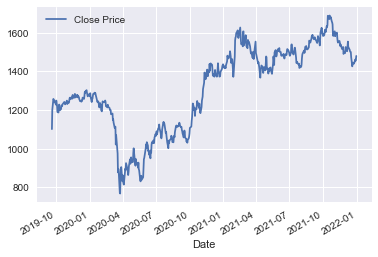

In [39]:
df.plot()

In [40]:
from statsmodels.tsa.stattools import adfuller

In [41]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Close Price'])

In [42]:
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: -1.2027032878470165
p-value: 0.6724317459853233
Critial Values: {'1%': -3.442060292264578, '5%': -2.866705729876777, '10%': -2.569521171354946}
Series is not Stationary


In [43]:
result = adfuller(df['Close Price'].diff().dropna())
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: -8.436514075569828
p-value: 1.8105665571753285e-13
Critial Values: {'1%': -3.442060292264578, '5%': -2.866705729876777, '10%': -2.569521171354946}
Series is Stationary


In [44]:
from statsmodels.graphics.tsaplots import plot_acf

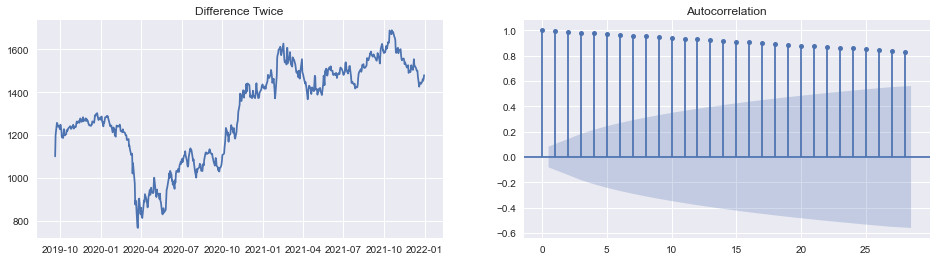

In [45]:
diff = df['Close Price']
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))

ax1.plot(diff)
ax1.set_title('Difference Twice')
plot_acf(diff,ax=ax2);

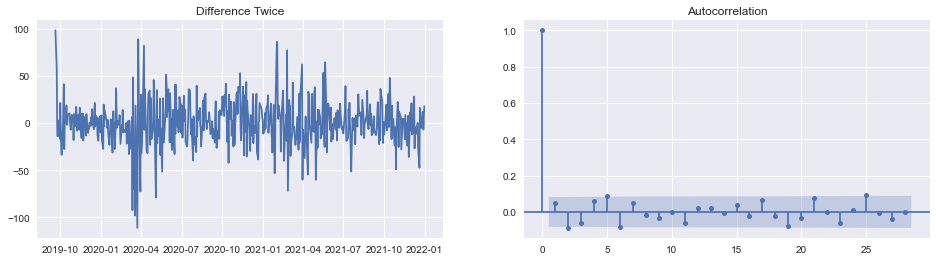

In [46]:
diff = df['Close Price'].diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))

ax1.plot(diff)
ax1.set_title('Difference Twice')
plot_acf(diff,ax=ax2);

In [47]:
from statsmodels.graphics.tsaplots import plot_pacf

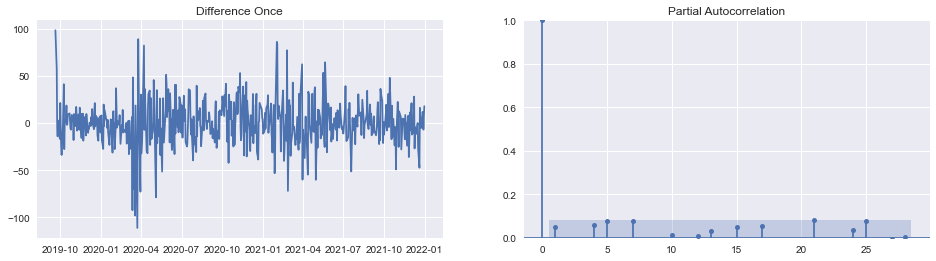

In [48]:
diff = df['Close Price'].diff().dropna()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference Once')
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

In [49]:
from pmdarima.arima.utils import ndiffs
y = df['Close Price']

## Adf Test
print(ndiffs(y, test='adf'))  # 2

# KPSS test
print(ndiffs(y, test='kpss')) # 0

# PP test:
print(ndiffs(y, test='pp'))  # 

1
1
1


In [50]:
train = df[:399]
test = df[399:]

In [51]:
import itertools
p = q = range(0, 3)
d= range(0,2)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 5)
Model: (0, 0, 1)(0, 0, 2, 5)
Model: (0, 0, 2)(0, 1, 0, 5)


In [52]:
dfObj = pd.DataFrame(columns=['param', 'AIC'])
dfObj

,param,AIC


In [53]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(train, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj = dfObj.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

C:\Users\BOOBESH\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\BOOBESH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

ARIMA(0, 0, 0) - AIC:5348.1124265845665
ARIMA(0, 0, 1) - AIC:4860.299611111073
ARIMA(0, 0, 2) - AIC:4534.604231754005
ARIMA(0, 1, 0) - AIC:3714.4483804600236
ARIMA(0, 1, 1) - AIC:3715.614391550779


C:\Users\BOOBESH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\BOOBESH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\BOOBESH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\BOOBESH\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and stats

ARIMA(0, 1, 2) - AIC:3716.7389445365234
ARIMA(1, 0, 0) - AIC:3728.6762914351575
ARIMA(1, 0, 1) - AIC:3729.6660912210245


C:\Users\BOOBESH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\BOOBESH\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'stat

ARIMA(1, 0, 2) - AIC:3730.9560054074645
ARIMA(1, 1, 0) - AIC:3715.7025196181057
ARIMA(1, 1, 1) - AIC:3717.3816217722424


C:\Users\BOOBESH\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\BOOBESH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

ARIMA(1, 1, 2) - AIC:3718.3565368136587
ARIMA(2, 0, 0) - AIC:3729.7649505738345
ARIMA(2, 0, 1) - AIC:3731.4617831376027
ARIMA(2, 0, 2) - AIC:3732.6447748188803


C:\Users\BOOBESH\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\BOOBESH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

ARIMA(2, 1, 0) - AIC:3716.432178545664
ARIMA(2, 1, 1) - AIC:3718.02358649499


C:\Users\BOOBESH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\BOOBESH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\BOOBESH\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is

ARIMA(2, 1, 2) - AIC:3715.1958465630587


C:\Users\BOOBESH\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [54]:
dfObj.sort_values(by=['AIC'])

,param,AIC
3,"(0, 1, 0)",3714.448380
17,"(2, 1, 2)",3715.195847
4,"(0, 1, 1)",3715.614392
9,"(1, 1, 0)",3715.702520
15,"(2, 1, 0)",3716.432179
5,"(0, 1, 2)",3716.738945
10,"(1, 1, 1)",3717.381622
16,"(2, 1, 1)",3718.023586
11,"(1, 1, 2)",3718.356537
6,"(1, 0, 0)",3728.676291


In [55]:
mod = ARIMA(train, order=(0,1,0))

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.Close Price   No. Observations:                  398
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1855.224
Method:                           css   S.D. of innovations             25.596
Date:                Tue, 31 May 2022   AIC                           3714.448
Time:                        13:09:25   BIC                           3722.421
Sample:                             1   HQIC                          3717.606
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9441      1.283      0.736      0.462      -1.571       3.459


C:\Users\BOOBESH\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\BOOBESH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

In [56]:
fc, se, conf = results_Arima.forecast(len(test), alpha=0.05)

In [57]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)


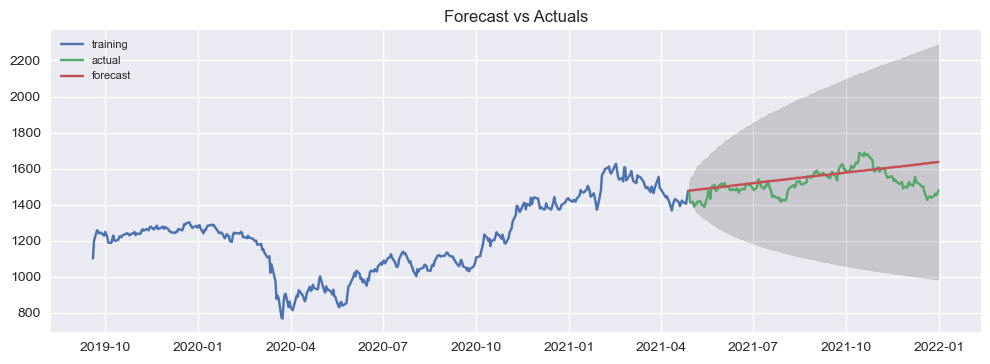

In [63]:
plt.figure(figsize=(12,4), dpi=100,facecolor='white')
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.savefig('Arima2.jpg',dpi=1200)
plt.show()

In [24]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test,fc))
print(rmse)

72.97348744887226
